In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import xgboost as xgb
import lightgbm as lgb

In [62]:
price_df = pd.read_csv(r"C:\Users\USER\Desktop\my_git\api-data-explorer\analysis\data\예매통계(가격대별)_20240101~20250228.csv")
genre_df = pd.read_csv(r"C:\Users\USER\Desktop\my_git\api-data-explorer\analysis\data\장르별 통계_20240101~20250228.csv")
print(price_df.shape)
print(genre_df.shape)

(882, 7)
(126, 7)


In [35]:
price_df.head()

,장르명,가격대,예매수,취소수,총티켓판매수,총티켓판매수_장르비중,총티켓판매액
0,연극,0원,74305,49324,24981,10.2,0
1,연극,3만원미만,160517,21718,138799,56.4,2462283
2,연극,3만원이상~5만원미만,81990,32186,49804,20.2,1966177
3,연극,5만원이상~7만원미만,46848,19928,26920,10.9,1540062
4,연극,7만원이상~10만원미만,8481,2852,5629,2.3,451110


In [36]:
genre_df.head()

,장르,개막편수,상연횟수,매출액,매출액점유율,관객수,관객점유율
0,연극,122,3866,5815875915,5.4,221753,13.7
1,뮤지컬,177,3650,46119374578,43.2,731327,45.3
2,서양음악(클래식),360,420,5852228480,5.5,164439,10.2
3,한국음악(국악),26,43,81093600,0.1,11938,0.7
4,대중음악,216,374,38844084302,36.4,321647,19.9


In [28]:
# for col in price_df.columns:
#     print(price_df[col].unique())
# for col in genre_df.columns:
#     print(genre_df[col].unique())

print(price_df['장르명'].unique())
print(genre_df['장르'].unique())

['연극' '뮤지컬' '서양음악(클래식)' '한국음악(국악)' '대중음악' '무용(서양/한국무용)' '대중무용' '서커스/마술'
 '복합']
['연극' '뮤지컬' '서양음악(클래식)' '한국음악(국악)' '대중음악' '무용(서양/한국무용)' '대중무용' '서커스/마술'
 '복합']


In [47]:
agg_dict = {
    '예매수': 'sum',
    '취소수': 'sum',
    '총티켓판매수' : 'sum',
    '총티켓판매액' : 'sum',
    # 장르비중은 평균 예시:
    '총티켓판매수_장르비중': 'mean'
}

price_grouped = price_df.groupby(['장르명', '가격대'], as_index=False).agg(agg_dict)
print(price_grouped.shape)
price_grouped

(63, 7)


,장르명,가격대,예매수,취소수,총티켓판매수,총티켓판매액,총티켓판매수_장르비중
0,대중무용,0원,9349,1039,8319,0,27.978571
1,대중무용,10만원이상~15만원미만,3031,2008,1025,124641,2.735714
2,대중무용,15만원이상,0,0,0,0,0.000000
3,대중무용,3만원미만,11530,1905,9625,106354,38.035714
4,대중무용,3만원이상~5만원미만,7363,2097,5266,194585,15.828571
...,...,...,...,...,...,...,...
58,한국음악(국악),15만원이상,3376,898,2478,420457,0.400000
59,한국음악(국악),3만원미만,320319,81485,238834,2903091,48.171429
60,한국음악(국악),3만원이상~5만원미만,50481,15683,34798,1178411,7.257143
61,한국음악(국악),5만원이상~7만원미만,15987,4268,11719,634775,2.342857


In [ ]:
# 만약 장르별로 중복 행이 있을 시, 최근 행만 남긴다고 가정(가장 아래 행)
genre_dedup = genre_df.groupby('장르', as_index=False).tail(1)

# 병합
genre_dedup = genre_df[['장르','매출액점유율','관객점유율']]  # 필요 컬럼만
genre_dedup = genre_dedup.rename(columns={'장르':'장르명'})  # 장르 -> 장르명

genre_dedup

In [68]:
df_merged = price_grouped.merge(genre_dedup, on='장르명', how='left')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_merged

,장르명,가격대,예매수,취소수,총티켓판매수,총티켓판매액,총티켓판매수_장르비중,매출액점유율,관객점유율
0,대중무용,0원,9349,1039,8319,0,27.978571,0.1,0.2
1,대중무용,0원,9349,1039,8319,0,27.978571,0.0,0.2
2,대중무용,0원,9349,1039,8319,0,27.978571,0.1,0.1
3,대중무용,0원,9349,1039,8319,0,27.978571,0.1,0.3
4,대중무용,0원,9349,1039,8319,0,27.978571,0.0,0.0
5,대중무용,0원,9349,1039,8319,0,27.978571,0.1,0.1
6,대중무용,0원,9349,1039,8319,0,27.978571,0.0,0.0
7,대중무용,0원,9349,1039,8319,0,27.978571,0.0,0.1
8,대중무용,0원,9349,1039,8319,0,27.978571,0.0,0.1
9,대중무용,0원,9349,1039,8319,0,27.978571,0.0,0.0


In [51]:
# 결측 제거
df = df_merged.dropna(subset=['총티켓판매수'])

# One-Hot
df = pd.get_dummies(df, columns=['장르명', '가격대'], drop_first=True)

# Feature
X_cols = [c for c in df.columns if c not in ['총티켓판매수', '총티켓판매수_장르비중']]
y_col = '총티켓판매수'

X = df[X_cols]
y = df[y_col]

# Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [52]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 16357.084747723595
MAE: 3811.170338983051


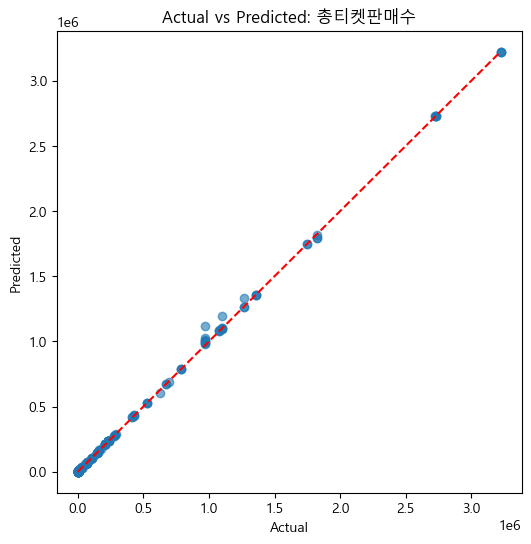

In [56]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')
plt.title("Actual vs Predicted: 총티켓판매수")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


c:\Users\USER\anaconda3\envs\ds_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\ds_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\ds_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\ds_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\ds_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from

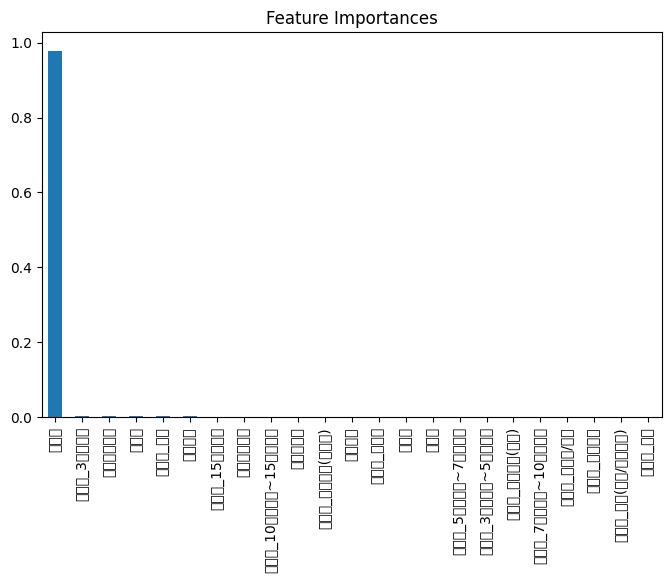

In [54]:
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=X_cols).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feat_importance.plot(kind='bar')
plt.title("Feature Importances")
plt.show()
